# Project 5 OpenClassroom
Brazilian E-Commerce Public Dataset by Olist
Welcome! This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.

In [1]:
# To display the graphs within the code and not in another windows
import sys
print("Python Version :"+str(sys.version_info))
%matplotlib inline
# To be able to use CSV
import csv
print("CSV Version :"+csv.__version__)
# To be able to use Numpy
import numpy as np
print("Numpy Version :"+np.__version__)
# To be able to use Pandas
import pandas as pd
print("Pandas Version :"+pd.__version__)
# To be able to use Maplotlib
import matplotlib.pyplot as plt

# To be able to use Seaborn
import seaborn as sns
print("Seaborn Version :"+sns.__version__)

# To be able to use Warning
import warnings

import string

import datetime as dt
import timeit
import time

import plotly.graph_objects as go
import plotly.express as pex
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import pairwise_distances_argmin
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

Python Version :sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)
CSV Version :1.0
Numpy Version :1.18.1
Pandas Version :1.0.1
Seaborn Version :0.10.0


### Init of the main variables

In [2]:
# Disable the warnings 'ignore'
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
# Load Pep8 checker
%load_ext pycodestyle_magic
%pycodestyle_on

In [3]:
smartdata = pd.read_csv('./SmartData.csv', sep=",", header=0)

In [4]:
smartdata

,number_of_orders,total_price,total_freight,total_payment,first_order_date,last_order_date,recency,time_to_deliver,error_between_estimated_and_delivery_date,product_category_name_agro_industry_and_commerce,product_category_name_air_conditioning,product_category_name_art,product_category_name_arts_and_craftmanship,product_category_name_audio,product_category_name_auto,product_category_name_baby,product_category_name_bed_bath_table,product_category_name_books_general_interest,product_category_name_books_imported,product_category_name_books_technical,product_category_name_cds_dvds_musicals,product_category_name_christmas_supplies,product_category_name_cine_photo,product_category_name_computers,product_category_name_computers_accessories,product_category_name_consoles_games,product_category_name_construction_tools_construction,product_category_name_construction_tools_lights,product_category_name_construction_tools_safety,product_category_name_cool_stuff,product_category_name_costruction_tools_garden,product_category_name_costruction_tools_tools,product_category_name_diapers_and_hygiene,product_category_name_drinks,product_category_name_dvds_blu_ray,product_category_name_electronics,product_category_name_fashio_female_clothing,product_category_name_fashion_bags_accessories,product_category_name_fashion_childrens_clothes,product_category_name_fashion_male_clothing,product_category_name_fashion_shoes,product_category_name_fashion_sport,product_category_name_fashion_underwear_beach,product_category_name_fixed_telephony,product_category_name_flowers,product_category_name_food,product_category_name_food_drink,product_category_name_furniture_bedroom,product_category_name_furniture_decor,product_category_name_furniture_living_room,product_category_name_furniture_mattress_and_upholstery,product_category_name_garden_tools,product_category_name_health_beauty,product_category_name_home_appliances,product_category_name_home_appliances_2,product_category_name_home_comfort_2,product_category_name_home_confort,product_category_name_home_construction,product_category_name_housewares,product_category_name_industry_commerce_and_business,product_category_name_kitchen_dining_laundry_garden_furniture,product_category_name_la_cuisine,product_category_name_luggage_accessories,product_category_name_market_place,product_category_name_music,product_category_name_musical_instruments,product_category_name_office_furniture,product_category_name_others,product_category_name_party_supplies,product_category_name_pc_gamer,product_category_name_perfumery,product_category_name_pet_shop,product_category_name_security_and_services,product_category_name_signaling_and_security,product_category_name_small_appliances,product_category_name_small_appliances_home_oven_and_coffee,product_category_name_sports_leisure,product_category_name_stationery,product_category_name_tablets_printing_image,product_category_name_telephony,product_category_name_toys,product_category_name_watches_gifts,product_category_name_nan,product_main_category_name_Convenience Products,product_main_category_name_Shopping Products,product_main_category_name_Speciality Products,product_main_category_name_Unsought Products,product_main_category_name_nan,customer_state_AC,customer_state_AL,customer_state_AM,customer_state_AP,customer_state_BA,customer_state_CE,customer_state_DF,customer_state_ES,customer_state_GO,customer_state_MA,customer_state_MG,customer_state_MS,customer_state_MT,customer_state_PA,customer_state_PB,customer_state_PE,customer_state_PI,customer_state_PR,customer_state_RJ,customer_state_RN,customer_state_RO,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO,customer_state_nan,review_score_1.0,review_score_2.0,review_score_3.0,review_score_4.0,review_score_5.0,review_score_nan,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,payment_type_nan,R,F,M,RFM_Segment_Concat,RFM_Score,RFM_Level
0,1,129.

In [5]:
product_category_df = smartdata.filter(regex=("product_category_*"))

### Functions 

### KModes

###### Apply KModes for a range from 1 to 10 clusters

In [44]:
cost = []
for num_clusters in list(range(1, 10)):
    print("Number of clusters :"+str(num_clusters))
    kmode = KModes(n_clusters=num_clusters, init="Cao", n_init=1, verbose=1)
    kmode.fit_predict(product_category_df)
    cost.append(kmode.cost_)

Number of clusters :1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 93357.0
Number of clusters :2
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 85005.0
Number of clusters :3
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 77835.0
Number of clusters :4
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 71510.0
Number of clusters :5
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 65620.0
Number of clusters :6
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 60148.0
Number of clusters :7
Init: initializing centroids
Init: initializing clusters
Starting iterat

######  Graph Cost vs Number of clusters

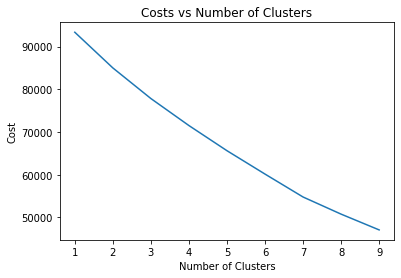

In [45]:
y = np.array([i for i in range(1, 10, 1)])
plt.plot(y, cost)
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.title('Costs vs Number of Clusters')
plt.savefig('kmodes_cost.png')

Higher is the number of Clusters, lower is the cost. For a detailed analysis, we select 8 clusters.

###### Detailed analysis for 8 clusters

In [46]:
km = KModes(n_clusters=8, init='Cao', n_init=1, verbose=1)
# fit the clusters to the skills dataframe
clusters = km.fit_predict(product_category_df)
# get an array of cluster modes
kmodes = km.cluster_centroids_
shape = kmodes.shape
# For each cluster mode (a vector of "1" and "0")
# find and print the column headings where "1" appears.
# If no "1" appears, assign to "no-skills" cluster.
for i in range(shape[0]):
    if sum(kmodes[i, :]) == 0:
        print("\ncluster " + str(i) + ": ")
        print("no-category cluster")
    else:
        print("\ncluster " + str(i) + ": ")
        cent = kmodes[i, :]
        for j in product_category_df.columns[np.nonzero(cent)]:
            print(j)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 50770.0

cluster 0: 
no-category cluster

cluster 1: 
product_category_name_health_beauty

cluster 2: 
product_category_name_sports_leisure

cluster 3: 
product_category_name_computers_accessories

cluster 4: 
product_category_name_furniture_decor

cluster 5: 
product_category_name_housewares

cluster 6: 
product_category_name_watches_gifts

cluster 7: 
product_category_name_telephony


In [47]:
clusters

array([0, 1, 0, ..., 0, 6, 0], dtype=uint16)

In [48]:
smartdata_cp = smartdata.reset_index()

In [49]:
clustersDf = pd.DataFrame(clusters)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([smartdata_cp, clustersDf], axis=1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis=1)

In [50]:
combinedDf

,number_of_orders,total_price,total_freight,total_payment,first_order_date,last_order_date,recency,time_to_deliver,error_between_estimated_and_delivery_date,product_category_name_agro_industry_and_commerce,product_category_name_air_conditioning,product_category_name_art,product_category_name_arts_and_craftmanship,product_category_name_audio,product_category_name_auto,product_category_name_baby,product_category_name_bed_bath_table,product_category_name_books_general_interest,product_category_name_books_imported,product_category_name_books_technical,product_category_name_cds_dvds_musicals,product_category_name_christmas_supplies,product_category_name_cine_photo,product_category_name_computers,product_category_name_computers_accessories,product_category_name_consoles_games,product_category_name_construction_tools_construction,product_category_name_construction_tools_lights,product_category_name_construction_tools_safety,product_category_name_cool_stuff,product_category_name_costruction_tools_garden,product_category_name_costruction_tools_tools,product_category_name_diapers_and_hygiene,product_category_name_drinks,product_category_name_dvds_blu_ray,product_category_name_electronics,product_category_name_fashio_female_clothing,product_category_name_fashion_bags_accessories,product_category_name_fashion_childrens_clothes,product_category_name_fashion_male_clothing,product_category_name_fashion_shoes,product_category_name_fashion_sport,product_category_name_fashion_underwear_beach,product_category_name_fixed_telephony,product_category_name_flowers,product_category_name_food,product_category_name_food_drink,product_category_name_furniture_bedroom,product_category_name_furniture_decor,product_category_name_furniture_living_room,product_category_name_furniture_mattress_and_upholstery,product_category_name_garden_tools,product_category_name_health_beauty,product_category_name_home_appliances,product_category_name_home_appliances_2,product_category_name_home_comfort_2,product_category_name_home_confort,product_category_name_home_construction,product_category_name_housewares,product_category_name_industry_commerce_and_business,product_category_name_kitchen_dining_laundry_garden_furniture,product_category_name_la_cuisine,product_category_name_luggage_accessories,product_category_name_market_place,product_category_name_music,product_category_name_musical_instruments,product_category_name_office_furniture,product_category_name_others,product_category_name_party_supplies,product_category_name_pc_gamer,product_category_name_perfumery,product_category_name_pet_shop,product_category_name_security_and_services,product_category_name_signaling_and_security,product_category_name_small_appliances,product_category_name_small_appliances_home_oven_and_coffee,product_category_name_sports_leisure,product_category_name_stationery,product_category_name_tablets_printing_image,product_category_name_telephony,product_category_name_toys,product_category_name_watches_gifts,product_category_name_nan,product_main_category_name_Convenience Products,product_main_category_name_Shopping Products,product_main_category_name_Speciality Products,product_main_category_name_Unsought Products,product_main_category_name_nan,customer_state_AC,customer_state_AL,customer_state_AM,customer_state_AP,customer_state_BA,customer_state_CE,customer_state_DF,customer_state_ES,customer_state_GO,customer_state_MA,customer_state_MG,customer_state_MS,customer_state_MT,customer_state_PA,customer_state_PB,customer_state_PE,customer_state_PI,customer_state_PR,customer_state_RJ,customer_state_RN,customer_state_RO,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO,customer_state_nan,review_score_1.0,review_score_2.0,review_score_3.0,review_score_4.0,review_score_5.0,review_score_nan,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,payment_type_nan,R,F,M,RFM_Segment_Concat,RFM_Score,RFM_Level,cluster_

###### Aggregation of the results for 8 clusters

In [51]:
# Calculate average values  and return a size of each segment

cluster_agg = combinedDf.groupby('cluster_predicted').agg(
    Recency_Mean=pd.NamedAgg(column='recency', aggfunc='mean'),
    Frequency_Mean=pd.NamedAgg(column='number_of_orders', aggfunc='mean'),
    Monetary_Mean=pd.NamedAgg(column='total_payment', aggfunc='mean'),
    Client_Number=pd.NamedAgg(column='total_payment', aggfunc='count')
).round(1)

In [52]:
cluster_agg

,Recency_Mean,Frequency_Mean,Monetary_Mean,Client_Number
cluster_predicted,,,,
0,247.1,1.2,216.7,50770
1,220.7,1.2,194.0,8352
2,250.0,1.2,188.4,7170
3,236.6,1.3,247.6,6325
4,264.4,1.4,238.4,5890
5,228.8,1.3,193.0,5472
6,207.4,1.2,261.1,5368
7,258.1,1.2,120.4,4010


The number of clients that does not belong to any clusters is too high (more than half of the records). This algorithm is not relevant in this context.

### KPrototypes

In [6]:
from kmodes.kprototypes import KPrototypes

In [7]:
client_satisfaction_df = smartdata.filter(regex=("review_score__*|number_of_orders|total_payment|recency"))

In [8]:
client_satisfaction_df

,number_of_orders,total_payment,recency,review_score_1.0,review_score_2.0,review_score_3.0,review_score_4.0,review_score_5.0,review_score_nan
0,1,141.90,116,0,0,0,0,1,0
1,1,27.19,119,0,0,0,1,0,0
2,1,86.22,542,0,0,1,0,0,0
3,1,43.62,326,0,0,0,1,0,0
4,1,196.89,293,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
93352,2,4134.84,452,0,0,0,0,1,0
93353,1,84.58,267,0,0,0,1,0,0
93354,1,112.46,573,0,0,0,0,1,0
93355,1,133.69,124,0,0,0,0,1,0


###### Compute the Average Basket

In [1]:
# client_satisfaction_df['AverageBasket'] = client_satisfaction_df['total_payment']/client_satisfaction_df['number_of_orders']

In [2]:
# client_satisfaction_df.drop(['total_payment', 'number_of_orders'], axis=1, inplace=True, errors='ignore')

###### Data standardisation

In [11]:
restricted_df = client_satisfaction_df.loc[:, ('number_of_orders', 'total_payment', 'recency')]

In [12]:
restrictedX = restricted_df.values.astype("float32", copy=False)

In [13]:
restrictedX = StandardScaler().fit_transform(restrictedX)

In [14]:
restrictedX

array([[-0.28217575, -0.10999458, -0.82886285],
       [-0.28217575, -0.2874997 , -0.80920196],
       [-0.28217575, -0.19615519,  1.9629849 ],
       ...,
       [-0.28217575, -0.15555075,  2.1661477 ],
       [-0.28217575, -0.12269892, -0.77643377],
       [-0.28217575, -0.21884044,  1.6156423 ]], dtype=float32)

In [15]:
client_satisfaction_df.loc[:, ('number_of_orders', 'total_payment', 'recency')] = restrictedX

In [16]:
client_satisfaction_df

,number_of_orders,total_payment,recency,review_score_1.0,review_score_2.0,review_score_3.0,review_score_4.0,review_score_5.0,review_score_nan
0,-0.282176,-0.109995,-0.828863,0,0,0,0,1,0
1,-0.282176,-0.287500,-0.809202,0,0,0,1,0,0
2,-0.282176,-0.196155,1.962985,0,0,1,0,0,0
3,-0.282176,-0.262075,0.547400,0,0,0,1,0,0
4,-0.282176,-0.024902,0.331130,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
93352,0.895379,6.068780,1.373158,0,0,0,0,1,0
93353,-0.282176,-0.198693,0.160736,0,0,0,1,0,0
93354,-0.282176,-0.155551,2.166148,0,0,0,0,1,0
93355,-0.282176,-0.122699,-0.776434,0,0,0,0,1,0


In [17]:
cost = []
for num_clusters in list(range(1, 10)):
    print("Number of clusters :"+str(num_clusters))
    kprototype = KPrototypes(n_clusters=num_clusters, init="Cao", n_init=1, verbose=1)
    kprototype.fit_predict(client_satisfaction_df, categorical=[3, 4, 5, 6, 7, 8])
    cost.append(kprototype.cost_)

Number of clusters :1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 318530.9972362199
Number of clusters :2
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 11732, ncost: 254036.4942657368
Run: 1, iteration: 2/100, moves: 4246, ncost: 253260.59368479755
Run: 1, iteration: 3/100, moves: 1602, ncost: 253137.63820328188
Run: 1, iteration: 4/100, moves: 722, ncost: 253113.0768548166
Run: 1, iteration: 5/100, moves: 648, ncost: 253092.318098177
Run: 1, iteration: 6/100, moves: 1599, ncost: 252979.16389042442
Run: 1, iteration: 7/100, moves: 1500, ncost: 252882.62321535905
Run: 1, iteration: 8/100, moves: 962, ncost: 252843.93220193443
Run: 1, iteration: 9/100, moves: 391, ncost: 252834.6188867685
Run: 1, iteration: 10/100, moves: 211, ncost: 252829.95459562138
Run: 1, iteration: 11/100, moves: 181, ncost: 252827.8962022668
Run: 1, iteration: 12/100, mo

Run: 1, iteration: 25/100, moves: 414, ncost: 137750.89779666517
Run: 1, iteration: 26/100, moves: 1667, ncost: 136812.4218521287
Run: 1, iteration: 27/100, moves: 3535, ncost: 135771.26842474667
Run: 1, iteration: 28/100, moves: 4667, ncost: 131953.52232435928
Run: 1, iteration: 29/100, moves: 4400, ncost: 130040.80028235518
Run: 1, iteration: 30/100, moves: 1469, ncost: 129430.15257206863
Run: 1, iteration: 31/100, moves: 939, ncost: 129247.13389604646
Run: 1, iteration: 32/100, moves: 646, ncost: 128832.0209200407
Run: 1, iteration: 33/100, moves: 438, ncost: 128657.60881414847
Run: 1, iteration: 34/100, moves: 279, ncost: 128543.53988361351
Run: 1, iteration: 35/100, moves: 176, ncost: 128539.57441809725
Run: 1, iteration: 36/100, moves: 119, ncost: 128538.24647601017
Run: 1, iteration: 37/100, moves: 100, ncost: 128537.88047157656
Run: 1, iteration: 38/100, moves: 40, ncost: 128537.77092661773
Run: 1, iteration: 39/100, moves: 14, ncost: 128537.74391293772
Run: 1, iteration: 40/10

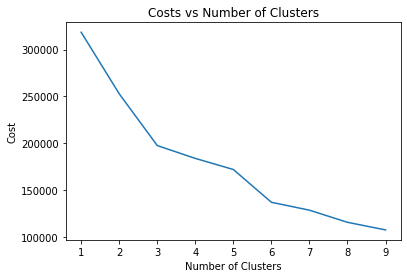

In [18]:
y = np.array([i for i in range(1, 10, 1)])
plt.plot(y, cost)
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.title('Costs vs Number of Clusters')
plt.savefig('kprototype_cost.png')

In [62]:
kp = KPrototypes(n_clusters=4, init="Cao", n_init=1, verbose=1)
# fit the clusters to the skills dataframe
clusters = kp.fit_predict(client_satisfaction_df, categorical=[3, 4, 5, 6, 7, 8])
# get an array of cluster modes
kproto = kp.cluster_centroids_

# Adding the predicted clusters to the main dataset
client_satisfaction_df['cluster_predicted'] = clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 23272, ncost: 243809.3445277963
Run: 1, iteration: 2/100, moves: 14150, ncost: 231244.18870410035
Run: 1, iteration: 3/100, moves: 4492, ncost: 226731.64033523676
Run: 1, iteration: 4/100, moves: 1549, ncost: 225445.42725902493
Run: 1, iteration: 5/100, moves: 966, ncost: 224586.9311003355
Run: 1, iteration: 6/100, moves: 324, ncost: 223938.8839690695
Run: 1, iteration: 7/100, moves: 174, ncost: 223512.8969098626
Run: 1, iteration: 8/100, moves: 637, ncost: 222914.12087054102
Run: 1, iteration: 9/100, moves: 2048, ncost: 221067.36793154656
Run: 1, iteration: 10/100, moves: 2522, ncost: 217191.45756688362
Run: 1, iteration: 11/100, moves: 680, ncost: 215075.46229070038
Run: 1, iteration: 12/100, moves: 217, ncost: 213072.9193668382
Run: 1, iteration: 13/100, moves: 111, ncost: 212232.13822724172
Run: 1, iteration: 14/100, moves: 150, ncost: 210364.16048223525
Run: 1, iteratio

In [63]:
smartdata_cp = smartdata.reset_index()

In [64]:
clustersDf = pd.DataFrame(clusters)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([smartdata_cp, clustersDf], axis=1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis=1)

In [65]:
# Calculate average values  and return a size of each segment

cluster_agg = combinedDf.groupby('cluster_predicted').agg(
    Recency_Mean=pd.NamedAgg(column='recency', aggfunc='mean'),
    Frequency_Mean=pd.NamedAgg(column='number_of_orders', aggfunc='mean'),
    Monetary_Mean=pd.NamedAgg(column='total_payment', aggfunc='mean'),
    review_score_1=pd.NamedAgg(column='review_score_1.0', aggfunc='sum'),
    review_score_2=pd.NamedAgg(column='review_score_2.0', aggfunc='sum'),
    review_score_3=pd.NamedAgg(column='review_score_3.0', aggfunc='sum'),
    review_score_4=pd.NamedAgg(column='review_score_4.0', aggfunc='sum'),
    review_score_5=pd.NamedAgg(column='review_score_5.0', aggfunc='sum'),
    Client_Number=pd.NamedAgg(column='total_payment', aggfunc='count')
).round(1)

In [66]:
cluster_agg

,Recency_Mean,Frequency_Mean,Monetary_Mean,review_score_1,review_score_2,review_score_3,review_score_4,review_score_5,Client_Number
cluster_predicted,,,,,,,,,
0,247.7,4.9,1504.5,474,128,191,368,1031,2192
1,226.2,14.7,25785.6,14,0,2,3,4,23
2,164.6,1.2,177.5,4288,1342,3717,0,39013,48360
3,330.3,1.1,173.2,4648,1440,3846,17999,14849,42782
